In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import pylab
import statistics

In [2]:
df=pd.read_csv("D:\\datasets\\Bone_Mineral_Density\\archive\\Bone_Mineral_density_data.csv")
df.head()

,Gender,Age,Height,Weight,BMI,L1-4,L1.4T,FN,FNT,TL,...,Hyperuricemia,AS,VT,VD,OP,CAD,CKD,Fracture,Smoking,Drinking
0,2,61.9,164.0,47.0,17.474717,0.894,-2.4,0.6895,-2.95,0.7130,...,1,1,0,1,1,1,0,No fracture,1,0
1,2,55.0,162.0,54.0,20.576132,1.333,1.3,0.9130,-1.30,1.0675,...,1,1,0,1,1,0,1,No fracture,0,0
2,2,44.0,160.0,54.0,21.093750,1.157,-0.2,0.5190,-3.85,0.5770,...,1,1,0,1,1,1,0,No fracture,0,0
3,1,64.7,158.0,59.0,23.634033,0.948,-2.3,0.7920,-2.15,0.9050,...,1,1,0,1,1,1,0,No fracture,1,1
4,1,88.5,167.0,60.0,21.513859,1.114,-0.9,0.8250,-1.90,0.9385,...,1,1,0,1,1,1,0,No fracture,1,0


In [3]:
df.isnull().sum()

Gender              0
Age                36
Height             34
Weight             34
BMI                34
L1-4                0
L1.4T               0
FN                  0
FNT                 0
TL                  0
TLT                 0
ALT                 2
AST                 2
BUN                 1
CREA                3
URIC                0
FBG                16
HDL-C              17
LDL-C              14
Ca                  2
P                   5
Mg                  3
Calsium             0
Calcitriol          0
Bisphosphonate      0
Calcitonin          0
HTN                 0
COPD                0
DM                  0
Hyperlipidaemia     0
Hyperuricemia       0
AS                  0
VT                  0
VD                  0
OP                  0
CAD                 0
CKD                 0
Fracture            0
Smoking             0
Drinking            0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

Gender             0
Age                0
Height             0
Weight             0
BMI                0
L1-4               0
L1.4T              0
FN                 0
FNT                0
TL                 0
TLT                0
ALT                0
AST                0
BUN                0
CREA               0
URIC               0
FBG                0
HDL-C              0
LDL-C              0
Ca                 0
P                  0
Mg                 0
Calsium            0
Calcitriol         0
Bisphosphonate     0
Calcitonin         0
HTN                0
COPD               0
DM                 0
Hyperlipidaemia    0
Hyperuricemia      0
AS                 0
VT                 0
VD                 0
OP                 0
CAD                0
CKD                0
Fracture           0
Smoking            0
Drinking           0
dtype: int64

In [6]:
df.shape

(1463, 40)

In [7]:
df.describe()

,Gender,Age,Height,Weight,BMI,L1-4,L1.4T,FN,FNT,TL,...,Hyperlipidaemia,Hyperuricemia,AS,VT,VD,OP,CAD,CKD,Smoking,Drinking
count,1463.00000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,...,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000
mean,1.38756,59.872317,165.770677,67.101504,24.308674,1.136846,-0.546740,0.867906,-1.295701,0.935698,...,0.391661,0.173616,0.753247,0.019139,0.075188,0.369105,0.205742,0.038278,0.255639,0.226931
std,0.48736,12.945111,8.073737,12.014973,3.324859,0.186578,1.518462,0.146395,1.117218,0.153964,...,0.488288,0.378908,0.431269,0.137059,0.263785,0.482727,0.404381,0.191931,0.436369,0.418991
min,1.00000,28.600000,141.000000,23.000000,9.213267,0.766000,-3.400000,0.327500,-5.050000,0.308000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.00000,51.000000,160.000000,58.000000,22.066075,1.000000,-1.600000,0.770000,-2.075000,0.836750,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.00000,57.000000,167.000000,67.000000,24.218750,1.125000,-0.700000,0.859000,-1.350000,0.927000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.00000,67.350000,172.000000,75.000000,26.383021,1.257000,0.400000,0.966000,-0.550000,1.037500,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,2.00000,99.800000,186.000000,113.000000,37.261470,1.936000,6.000000,1.419000,2.700000,1.456500,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

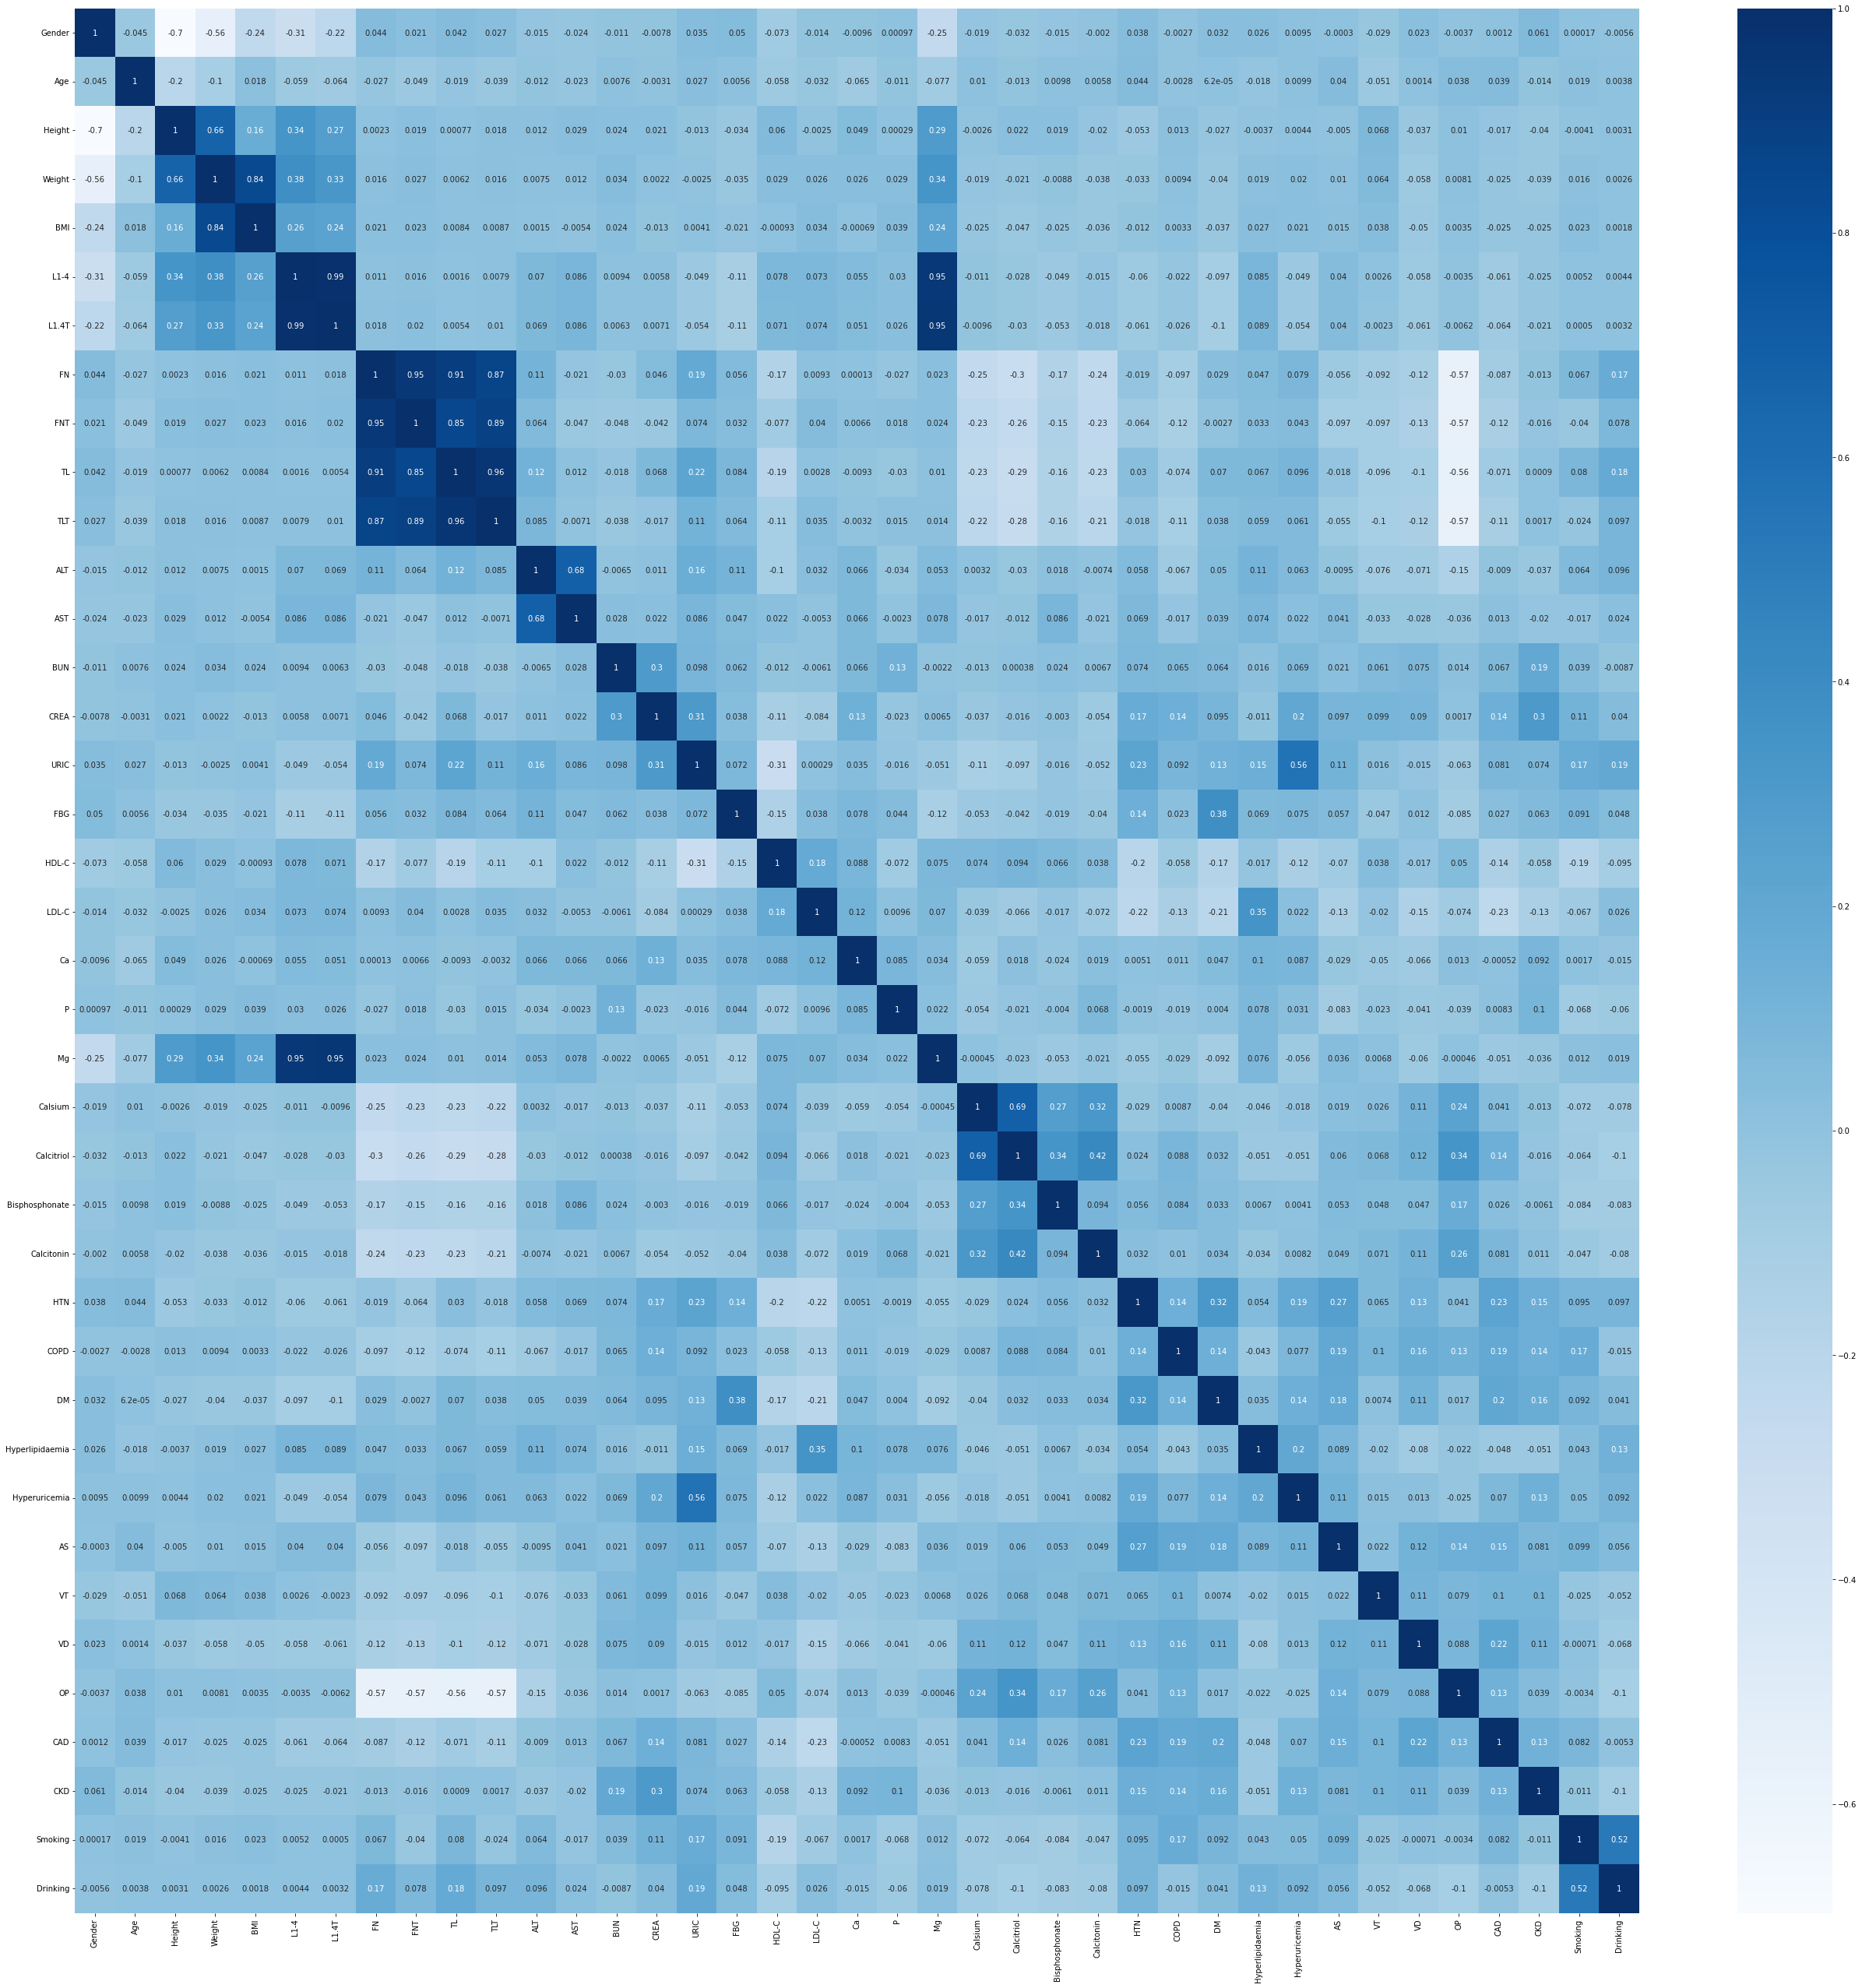

In [8]:
plt.figure(figsize=(45,45))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [9]:
df['Fracture'].unique()

array(['No fracture', 'fracture'], dtype=object)

In [12]:
df['Fracture'].replace(('No fracture','fracture'),(0,1),inplace=True)

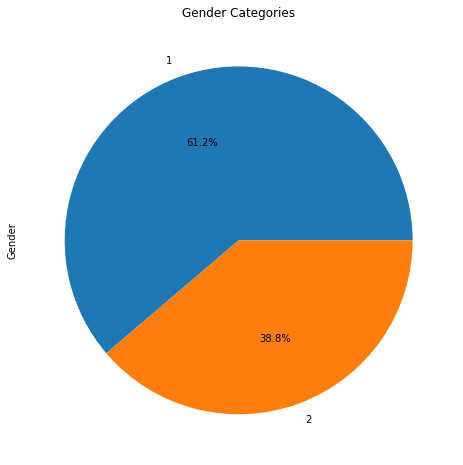

In [13]:
plt.figure(figsize=(10,8))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%').set_title('Gender Categories')
plt.show()

In [15]:
#PCA

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df)
X_scaled=scaler.transform(df)

In [16]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X_scaled)

PCA(n_components=2)

In [17]:
X_pca=pca.transform(X_scaled)
print("Original Shape:{}".format(str(X_scaled.shape)))
print("Reduced Shape:{}".format(str(X_pca.shape)))

Original Shape:(1463, 40)
Reduced Shape:(1463, 2)


In [18]:
print("PCA component shape{}".format(pca.components_.shape))

PCA component shape(2, 40)


In [19]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[-0.0041287   0.0197155  -0.01648163 -0.03031223 -0.02869238 -0.03577129
  -0.03716653 -0.41349746 -0.3993381  -0.41201102 -0.4036897  -0.07803385
  -0.01789033  0.01549172 -0.01411973 -0.10672282 -0.04819944  0.08518395
  -0.04476106 -0.01064175 -0.0054104  -0.03699734  0.20154618  0.23901078
   0.13274848  0.17998355  0.01324162  0.07285302 -0.00921019 -0.05597305
  -0.05643633  0.04464533  0.07368803  0.09955688  0.315385    0.0804485
   0.01661891  0.06594967 -0.04418319 -0.10448039]
 [-0.28581315 -0.06311457  0.30759688  0.35864815  0.25369899  0.43450186
   0.41766254 -0.03847083 -0.02037076 -0.05054943 -0.03296856  0.02324042
   0.04223392 -0.00978408 -0.04146388 -0.08303567 -0.09554078  0.10310276
   0.07981039  0.03039829  0.01591084  0.41629253  0.01182943  0.00245622
  -0.01300308 -0.00683225 -0.0984686  -0.04033582 -0.11477251  0.03616878
  -0.06385775 -0.02135417  0.01586264 -0.06436814  0.02089871 -0.07386772
  -0.06354746  0.00435156 -0.02981724 -0.01940

Text(0, 0.5, 'Principal Components')

<Figure size 720x2448 with 0 Axes>

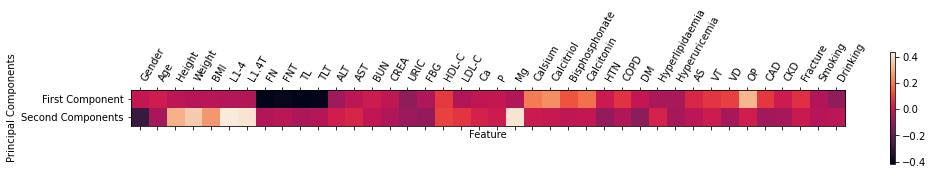

In [20]:
plt.figure(figsize=(10,34))
plt.matshow(pca.components_, cmap='rocket')
plt.yticks([0,1],["First Component","Second Components"])
plt.colorbar()
plt.xticks(range(len(df.columns)),df.columns,rotation=60,ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal Components")

# LDA


In [25]:
X = df.drop(['Fracture'],axis=1)
Y = df['Fracture']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state= 0)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 1)
X_train = lda.fit_transform(X_train, Y_train)
X_test = lda.transform(X_test)

In [29]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth = 2, random_state = 0)
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [30]:
y_pred = clf.predict(X_test)
y_pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[285   0]
 [  7   1]]


In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [33]:
print('Test Accuracy',accuracy_score(Y_test, y_pred))

Test Accuracy 0.9761092150170648


In [34]:
#2D plot

def plot_2D(component1):
    fig = go.Figure(data = go.Scatter(X = component1, mode ='markers', marker = dict(size = 20, color = Y, colorscale = 'Rainbow')))
    fig.update_layout(margin = dict(l = 100,r = 100,b = 100,t = 100)) 
    fig.layout.template = 'plotly_dark'
                                                                                                                                                                       
    fig.show() 

In [35]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [36]:
X_LDA = LDA(n_components = 1).fit_transform(X, Y)
X_LDA[0:10]

array([[ 1.14561433],
       [ 0.20762611],
       [ 2.05439125],
       [ 0.62043346],
       [ 0.50770531],
       [ 1.53062066],
       [ 0.55409798],
       [ 0.98160262],
       [-0.30494417],
       [-0.1075107 ]])